# Fitting a Gaussian

## Univariate Gaussian

Univariate Gaussian formula:
$$
N = \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(x-\mu)^2)
$$

Likelihood function:
$$
L = \prod^n N = \prod^n \frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(x-\mu)^2) \Rightarrow \\
\Rightarrow \log(L) = \sum^n \log(\frac{1}{\sqrt{2\pi\sigma^2}}) -\frac{1}{2\sigma^2}(x-\mu)^2
$$

### Parameter estimation
1. MLE:  $\mu$
$$
\frac{\partial \log(L)}{\partial \mu} = 0 \Rightarrow \\
\Rightarrow \sum^n \frac{1}{2 \sigma^2} 2 (x_i - \mu) = 0 \Rightarrow \\
\Rightarrow \sum^n \frac{x_i}{\sigma^2} = \frac{n \mu}{\sigma^2} \Rightarrow \\
\Rightarrow \mu = \frac{1}{n} \sum^n x_i 
$$

2. MLE: $\sigma^2$
$$
\frac{\partial \log(L)}{\partial \sigma^2} = 0 \Rightarrow \\
\Rightarrow \sum^n \sqrt{2 \pi \sigma^2} (-1) \frac{1}{\sqrt{2 \pi \sigma^2}} 2 \pi \frac{1}{2} (2 \pi \sigma^2)^{-\frac{1}{2}} - (x - \mu)^2 \frac{1}{2} (-1) \frac{1}{\sigma^4} = 0 \Rightarrow \\
\Rightarrow \sum^n - \frac{1}{2\sigma^2} + \frac{1}{2\sigma^4}(x-\mu)^2 = 0 \Rightarrow \\
\Rightarrow \sum^n \frac{1}{2\sigma^4} (x-\mu)^2 = \frac{n}{2\sigma^2} \Rightarrow \\
\Rightarrow \sigma^2 = \frac{1}{n} \sum^n (x-\mu)^2
$$

## Multivariate Gaussian

Multivariate Gaussian formula:
$$
N = \frac{1}{(2\pi)^\frac{n}{2} |\Sigma|^\frac{1}{2}} exp(-\frac{1}{2} (x - \mu)^T \Sigma^{-1}  (x - \mu))
$$


Likelihood function:
$$
L = \prod^n N = \prod^n \frac{1}{(2\pi)^\frac{n}{2} |\Sigma|^\frac{1}{2}} exp(-\frac{1}{2} (x - \mu)^T \Sigma^{-1}  (x - \mu)) \Rightarrow \\
\Rightarrow \sum^n \log(\frac{1}{(2\pi)^\frac{n}{2} |\Sigma|^\frac{1}{2}}) - \frac{1}{2} (x - \mu)^T \Sigma^{-1}  (x - \mu) \Rightarrow
$$

### Quadratic forms
Ref: https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/v/expressing-a-quadratic-form-with-a-matrix

We know that a term is _quadratic_ when its variable is squared, or we have two variables. When all terms in a formula are quadratic (that is, it is purely quadratic), we dubbed it a _quadratic form_: $ax^2 + bxy + cy^2$

We can write a formula like $ax + by + cz$ in vector form as: $a^T x$, where:

$$
\begin{bmatrix}
    a & b & c
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix}
=
ax + by + cz
$$

Then, a quadratic form like $ax^2 + bxy + cy^2$, if we think of $b$ as $2b$ (we can express $b$ whichever way we want), as: $x^T A x$, where:

$$
\begin{bmatrix}
    x & y
\end{bmatrix}
\begin{bmatrix}
    a & b \\
    b & c
\end{bmatrix}
\begin{bmatrix}
    x \\
    y
\end{bmatrix}
=
\begin{bmatrix}
    x & y
\end{bmatrix}
\begin{bmatrix}
    ax + by \\
    xb + cy
\end{bmatrix}
=
ax^2 + byx + xby + cy^2
=
ax^2 + 2bxy + cy^2
$$

### Parameter estimation

1. MLE: $\mu$

From the cookbook, we know that:
$$
\frac{\partial}{\partial{s}} (x - s)^T W (x - s) = -2 W (x - s) 
$$

Applying it, then:
$$
- \frac{1}{2} \sum^n (-2) \Sigma^{-1} (x_i - \mu) = 0 \Rightarrow \\
\Rightarrow \sum^n \Sigma^{-1} x_i = n \Sigma^{-1} \mu \Rightarrow \\
\Rightarrow \mu = \frac{1}{n} \sum^n x_i
$$

2. MLE: $\Sigma$

Ref: https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf

This case is somewhat more complicated, and it turns out to be simpler if we rewrite the likelihood function in terms of $\Sigma^{-1}$, and take the derivate wrt $\Sigma^{-1}$ as well.

We know that:
$$
|A^{-1}| = \frac{1}{|A|}
$$

and so:

$$
L = \sum^n \log(\frac{1}{(2\pi)^\frac{d}{2} |\Sigma|^\frac{1}{2}}) - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \Rightarrow \\
\Rightarrow \sum^n \log(\frac{1}{(2\pi)^\frac{d}{2} (\frac{1}{|\Sigma^{-1}|})^\frac{1}{2}}) - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \Rightarrow
$$

The first term of the formula is derived using the standard rules of derivation, plus (from the cookbook):

$$
\frac{\partial |A|}{\partial A} = |A| (A^{-1})^T
$$

For the second term, from the cookbook we know that:

$$
\frac{\partial x^t A x}{\partial A} = xx^T
$$

$$
\frac{\partial{L}}{\partial{\Sigma^{-1}}} = 0 \Rightarrow \\
\Rightarrow \sum^n (2\pi)^\frac{d}{2} (\frac{1}{|\Sigma^{-1}|})^\frac{1}{2} (-1) \frac{1}{((2\pi)^\frac{d}{2})^2} |\Sigma^{-1}| (2\pi)^\frac{d}{2} \frac{1}{2} (\frac{1}{|\Sigma^{-1}|})^\frac{-1}{2} (-1) \frac{1}{(|\Sigma^{-1}|)^2} |\Sigma^{-1}| \Sigma^T - \sum^n \frac{1}{2} (x_i - \mu) (x_i - \mu)^T = 0 \Rightarrow \\
\Rightarrow \frac{n}{2} \Sigma^T - \sum^n \frac{1}{2} (x_i - \mu) (x_i - \mu)^T = 0 \Rightarrow \\
\Rightarrow \frac{n}{2} \Sigma = \sum^n \frac{1}{2} (x_i - \mu) (x_i - \mu)^T \Rightarrow \\
\Rightarrow \Sigma = \frac{1}{n} \sum^n (x_i - \mu) (x_i - \mu)^T
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

mu = [.9, .0]
sigma = np.matrix([[1., 0.2],[.2, .5]])

n_samples = 1000

y = np.random.multivariate_normal(mu, sigma, n_samples)

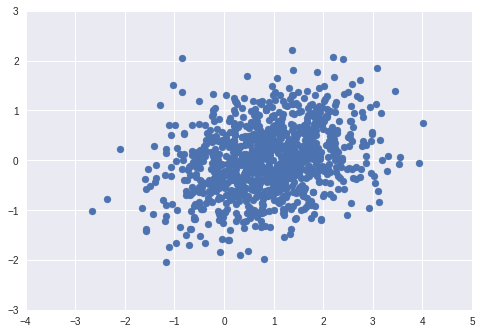

In [2]:
plt.scatter(y[:,0], y[:,1])
plt.ylim((-3,3))
plt.xlim((-4,5))
plt.show()

In [3]:
np.mean(y, axis=0)

array([ 0.86186754, -0.0123602 ])

In [4]:
np.divide(np.dot(y.T,y), y.shape[0])

array([[ 1.71612264,  0.18627172],
       [ 0.18627172,  0.4794422 ]])